In [1]:
import gym
import gym_env
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from mdpAgents import * 
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
env = gym.make('foraging-replenishing-patches-v0')

env.reset()
for i in range(300):
    action = np.random.randint(9)
    state, reward, done, _ = env.step(action)
    #print(action, state, reward, done)
    if done:
        break

#### Basic MDP for Block 1



SARSA
max_reward 15984.270000000008
avg_harvest_time 196.05
avg_travel_time 103.94999999999999
avg_staying_time [1.         4.19973062 4.27998166        nan 4.23584487        nan
 3.68708579        nan]


Qlearning
max_reward 18971.819999999992
avg_harvest_time 183.7
avg_travel_time 116.30000000000001
avg_staying_time [1.         3.41772436 3.48179487 1.         3.38233974 1.
 3.32842949 1.        ]


SARSA MVT
max_reward 16129.17000000001
avg_harvest_time 204.16500000000002
avg_travel_time 95.83499999999998
avg_staying_time [1.         4.76367736 4.36010178        nan 4.71558141        nan
 4.3199218         nan]


SARSA LDA
max_reward 14552.64
avg_harvest_time 208.6
avg_travel_time 91.4
avg_staying_time [1.         5.33690296        nan        nan 5.16193182        nan
 5.36691003        nan]


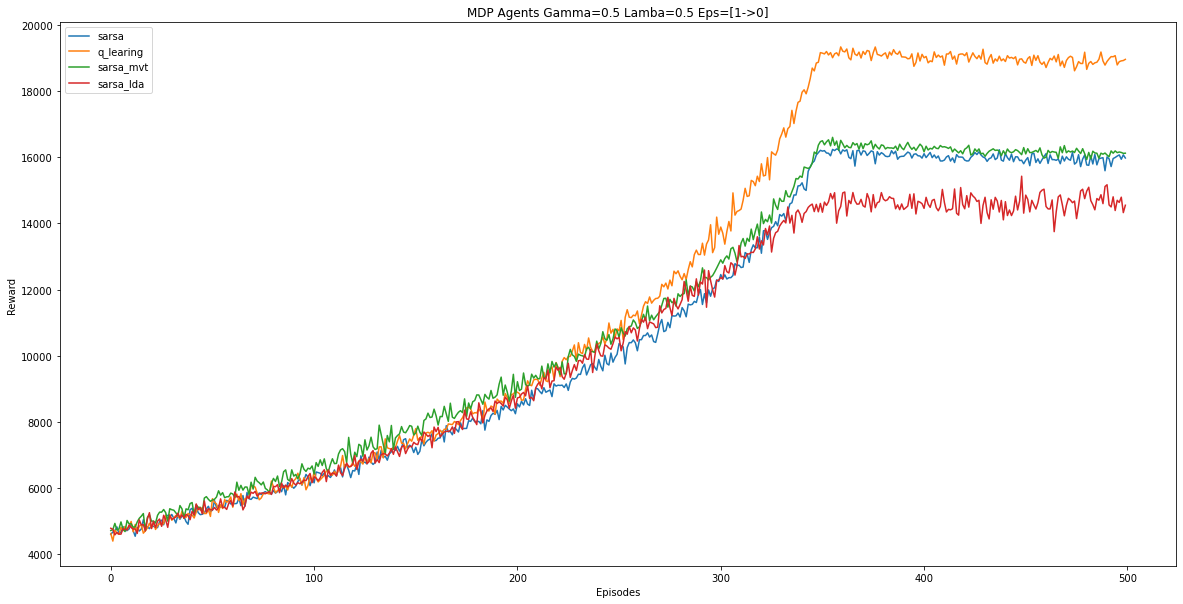

In [3]:
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
print('\n\nSARSA')
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.title("sarsa epsilon decay [1->0 till 500 eps]")
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='sarsa')


print('\n\nQlearning')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs,info = q_learning(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='q_learing')

print('\n\nSARSA MVT')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = sarsa_mvt(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='sarsa_mvt')

print('\n\nSARSA LDA')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = sarsa_lda(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.1, decayType='linear', maxTime=300, decayTill=350, lda=0.5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='sarsa_lda')
plt.title("MDP Agents Gamma=0.5 Lamba=0.5 Eps=[1->0]")

plt.legend()
plt.savefig('basic_mdp_stable_b1.pdf')

#### Basic MDP for Block 3



SARSA
max_reward 21019.769999999986
avg_harvest_time 206.75
avg_travel_time 93.25
avg_staying_time [3.01406746        nan        nan 3.70311869 4.88366758        nan
 5.29307005        nan]


Qlearning
max_reward 25558.784999999963
avg_harvest_time 177.05
avg_travel_time 122.94999999999999
avg_staying_time [1.83772394 1.         1.         2.60227106 3.21950747 1.
 3.87321014 1.        ]


SARSA MVT
max_reward 21250.30499999999
avg_harvest_time 206.05500000000006
avg_travel_time 93.94499999999994
avg_staying_time [2.99804517        nan        nan 3.62370494 4.91937077        nan
 5.25712234        nan]


SARSA LDA
max_reward 18411.929999999997
avg_harvest_time 223.0
avg_travel_time 77.0
avg_staying_time [4.19561508        nan        nan 5.5693254  6.60875097        nan
 7.50883644 1.        ]


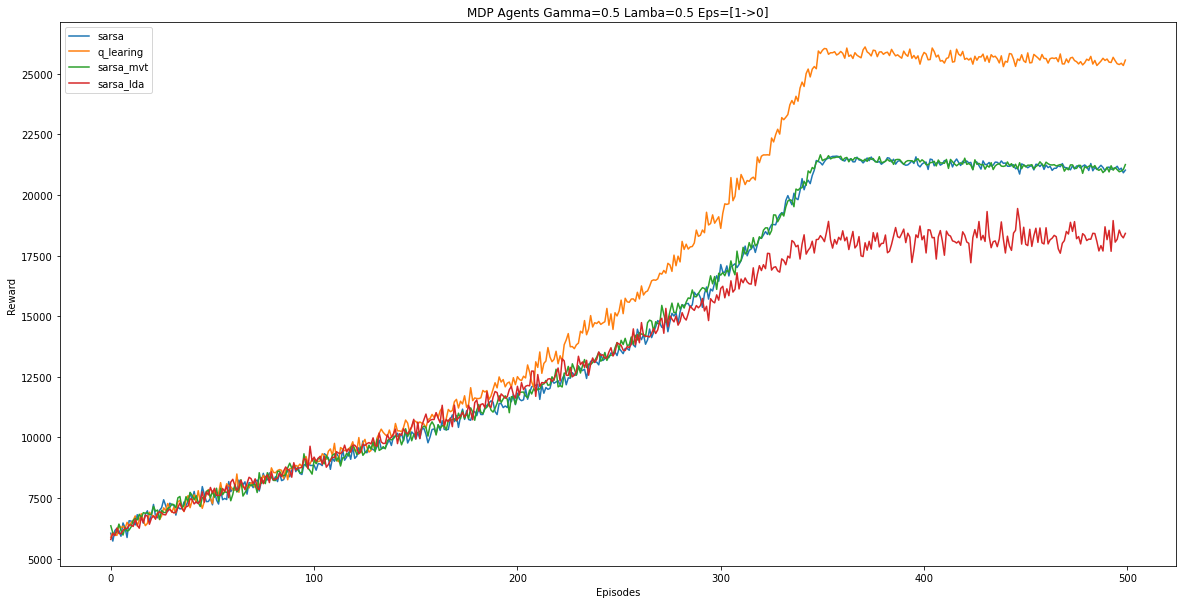

In [4]:
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
print('\n\nSARSA')
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.title("sarsa epsilon decay [1->0 till 500 eps]")
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='sarsa')


print('\n\nQlearning')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs,info = q_learning(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='q_learing')

print('\n\nSARSA MVT')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = sarsa_mvt(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='sarsa_mvt')

print('\n\nSARSA LDA')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = sarsa_lda(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.1, decayType='linear', maxTime=300, decayTill=350, lda=0.5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='sarsa_lda')
plt.title("MDP Agents Gamma=0.5 Lamba=0.5 Eps=[1->0]")

plt.legend()
plt.savefig('basic_mdp_stable.pdf')

#### Forgetful variations for Block 1



SARSA 0 Forgetful
max_reward 15818.040000000008
avg_harvest_time 195.6
avg_travel_time 104.4
avg_staying_time [1.         4.54112105 3.9840772         nan 3.85519676        nan
 3.99756844        nan]


SARSA 0.5 Forgetful


C:\Users\Lenovo\Desktop\archi\ForagingReplenishingPatches-main\mdpAgents.py:304: RuntimeWarning: divide by zero encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 1272.7349999999997
avg_harvest_time 293.95
avg_travel_time 6.050000000000011
avg_staying_time [ 1. nan nan nan nan nan nan nan]


 Sarsa Forget Decay
max_reward 14288.895000000008
avg_harvest_time 201.25
avg_travel_time 98.75
avg_staying_time [1.         4.27482143 3.92696429        nan 4.57946429        nan
 4.69732143        nan]


SARSA WM 5/8
max_reward 10822.41
avg_harvest_time 140.71999999999997
avg_travel_time 159.28000000000003
avg_staying_time [1.03080495 1.78585605 1.79571294        nan 1.7842059         nan
 1.859181          nan]


SARSA WM 7/8
max_reward 12069.99
avg_harvest_time 167.025
avg_travel_time 132.975
avg_staying_time [1.00977654 2.5745868  2.5822873         nan 2.70665569        nan
 2.75865142        nan]


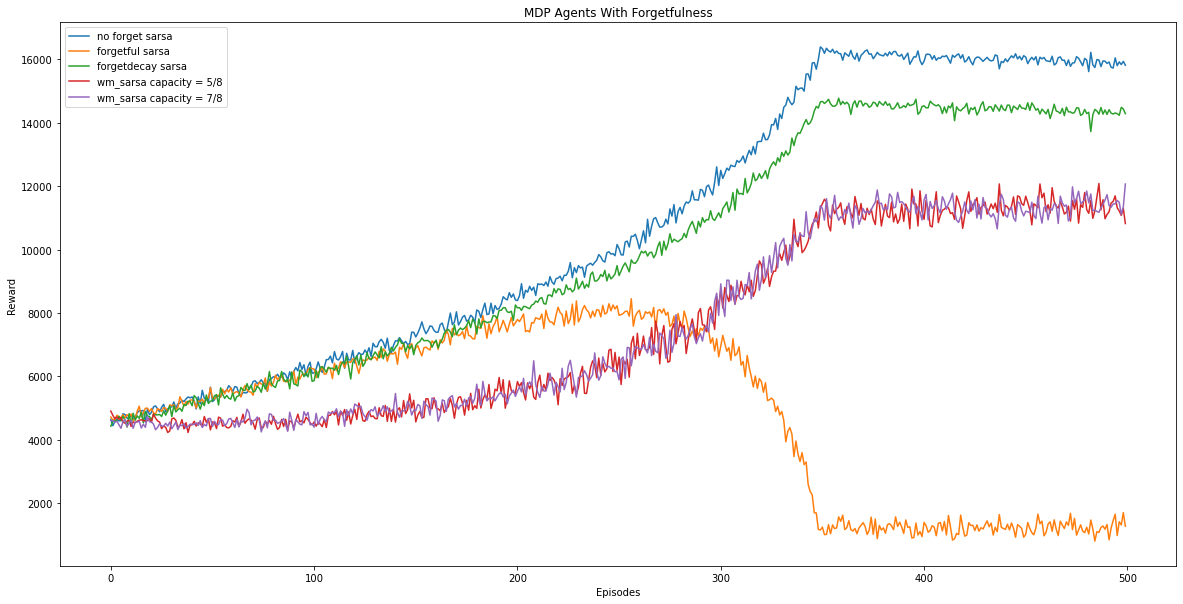

In [5]:
print('\n\nSARSA 0 Forgetful')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = forgetfull_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350,forgetDecay=0)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='no forget sarsa')

print('\n\nSARSA 0.5 Forgetful')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = forgetfull_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350,forgetDecay=0.5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='forgetful sarsa')

print('\n\n Sarsa Forget Decay')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = forgetDecay_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='forgetdecay sarsa')

print('\n\nSARSA WM 5/8')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 5/8)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa capacity = 5/8')

print('\n\nSARSA WM 7/8')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 7/8)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa capacity = 7/8')
plt.title("MDP Agents With Forgetfulness")

plt.legend()
plt.savefig('forget_mdp_b1.pdf')

#### Forgetful variations for Block 3



SARSA 0 Forgetful
max_reward 20989.889999999992
avg_harvest_time 207.35
avg_travel_time 92.65
avg_staying_time [3.0018759         nan        nan 3.86998737 4.9079098         nan
 5.34799679        nan]


SARSA 0.5 Forgetful


C:\Users\Lenovo\Desktop\archi\ForagingReplenishingPatches-main\mdpAgents.py:304: RuntimeWarning: divide by zero encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 1604.2049999999997
avg_harvest_time 286.55
avg_travel_time 13.449999999999989
avg_staying_time [inf nan nan nan nan nan nan nan]


 Sarsa Forget Decay
max_reward 19047.329999999998
avg_harvest_time 209.3
avg_travel_time 90.69999999999999
avg_staying_time [2.88938492        nan        nan 4.03313131 5.31974276        nan
 5.78269695        nan]


SARSA WM 5/8
max_reward 14036.625000000004
avg_harvest_time 197.55
avg_travel_time 102.44999999999999
avg_staying_time [2.77399892        nan        nan 3.49277584 4.22024669        nan
 4.5128612         nan]


SARSA WM 7/8
max_reward 16974.945
avg_harvest_time 201.8
avg_travel_time 98.19999999999999
avg_staying_time [2.68666181        nan        nan 3.53222222 4.70905719        nan
 5.2714446         nan]


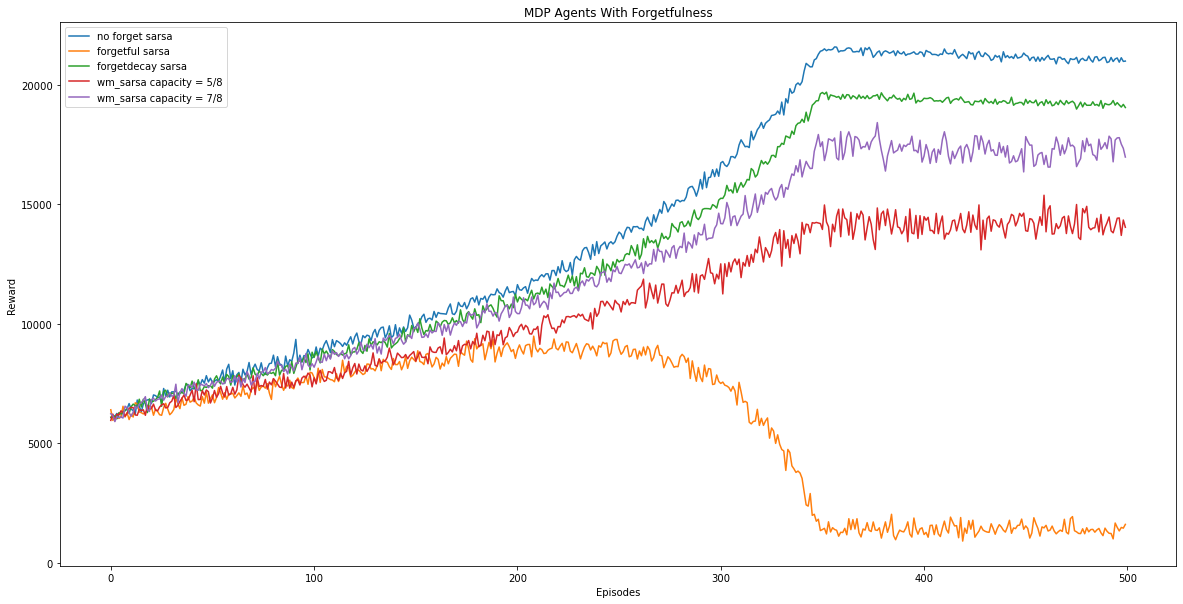

In [6]:
print('\n\nSARSA 0 Forgetful')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = forgetfull_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350,forgetDecay=0)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='no forget sarsa')

print('\n\nSARSA 0.5 Forgetful')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = forgetfull_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350,forgetDecay=0.5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='forgetful sarsa')

print('\n\n Sarsa Forget Decay')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = forgetDecay_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='forgetdecay sarsa')

print('\n\nSARSA WM 5/8')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa capacity = 5/8')

print('\n\nSARSA WM 7/8')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 7)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa capacity = 7/8')
plt.title("MDP Agents With Forgetfulness")

plt.legend()
plt.savefig('forget_mdp.pdf')

#### Effect of Capacity and Load on Performance



SARSA WM Block 1
max_reward 15823.935000000012
avg_harvest_time 195.15
avg_travel_time 104.85
avg_staying_time [1.         4.13962504 4.260183          nan 3.86831894        nan
 4.07045112        nan]


SARSA WM Block 2
max_reward 18806.085
avg_harvest_time 197.1
avg_travel_time 102.9
avg_staying_time [1.                nan 4.52819909 3.15747655        nan 3.94637092
        nan 4.53543498]


SARSA WM Block 3
max_reward 21191.849999999995
avg_harvest_time 205.8
avg_travel_time 94.19999999999999
avg_staying_time [3.01763889        nan        nan 3.71954545 4.85003913        nan
 5.19798755        nan]


SARSA WM with Load Block 1
max_reward 11734.335000000003
avg_harvest_time 196.8
avg_travel_time 103.19999999999999
avg_staying_time [1.         3.91004045 4.11574655        nan 4.28150738        nan
 4.08491933        nan]


SARSA WM with load Block 2
max_reward 12664.035
avg_harvest_time 194.3
avg_travel_time 105.69999999999999
avg_staying_time [1.                nan 4.55894756 2.602

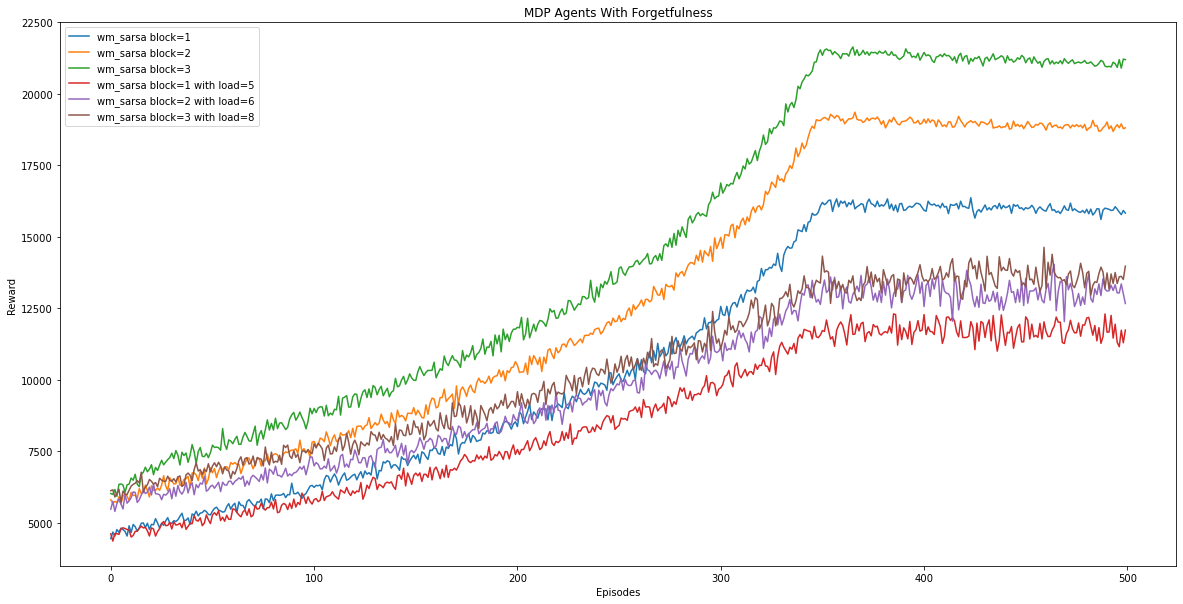

In [10]:
print('\n\nSARSA WM Block 1')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 8)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa block=1')


print('\n\nSARSA WM Block 2')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=2)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 8)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa block=2')
plt.title("MDP Agents With Forgetfulness")

print('\n\nSARSA WM Block 3')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 8)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa block=3')
plt.title("MDP Agents With Forgetfulness")


print('\n\nSARSA WM with Load Block 1')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 4, load=True)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa block=1 with load=5')
plt.title("MDP Agents With Forgetfulness")

print('\n\nSARSA WM with load Block 2')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=2)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 4, load=True)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa block=2 with load=6')
plt.title("MDP Agents With Forgetfulness")

print('\n\nSARSA WM with load Block 3')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 4, load=True)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa block=3 with load=8')
plt.title("MDP Agents With Forgetfulness")

plt.legend()
plt.savefig('wm_b.pdf')

max_reward 19045.17
avg_harvest_time 183.95
avg_travel_time 116.05000000000001
avg_staying_time [1.         3.25815705 3.50048993 1.         3.45200466 1.
 3.48935897 1.        ]


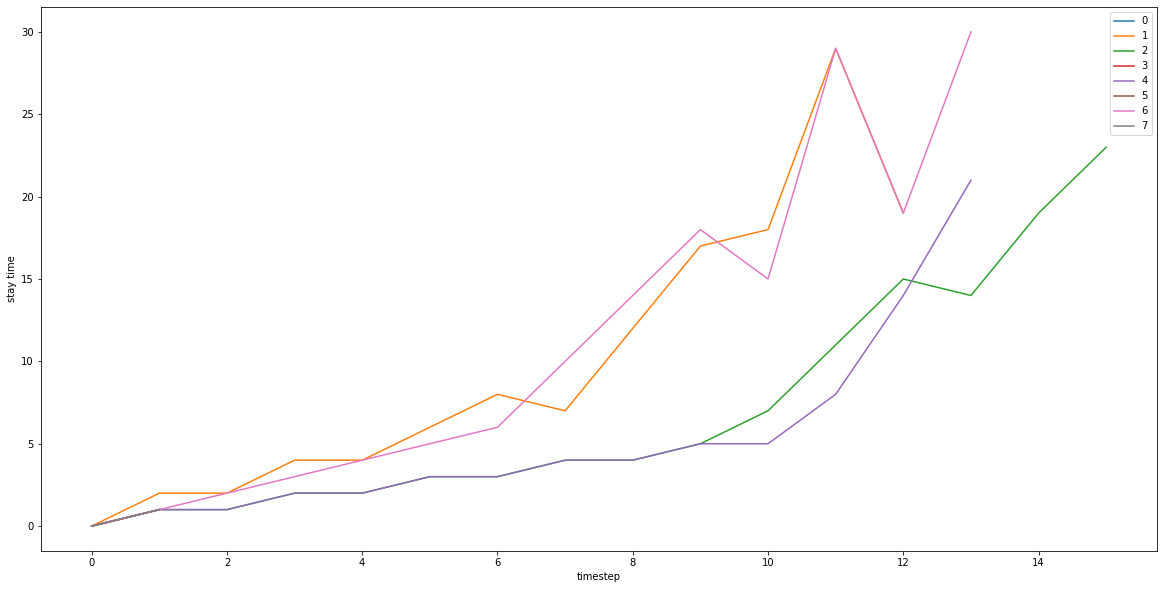

In [9]:
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs, patch = q_learning(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('timestep')
plt.ylabel('stay time') 
for i in range (8):
    plt.plot(patch[i], label=str(i))
plt.legend()